In [35]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import torch
from PIL import Image
from torch.utils.data import TensorDataset
import torchvision
import torch.nn as nn
from torch.optim import Adam

from torchvision import transforms, datasets
from torch.utils.data import Subset

from torchvision.datasets import CIFAR10
from tqdm import tqdm

In [8]:
# prompt: load the CIFAR-10 dataset with pytorch

import torch
import torchvision
import torchvision.transforms as transforms
def load_cifar10():
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, shuffle=False, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    return trainset, trainloader, testset, testloader, classes


In [9]:
trainset,trainloader,testset,testloader,classes = load_cifar10()

100%|██████████| 170M/170M [00:02<00:00, 75.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [13]:
# prompt: delete a given path recursivly

import shutil
import os

def remove_path_recursively(path):
    """Removes a given path recursively.

    Args:
      path: The path to remove.
    """
    if os.path.exists(path):
        try:
            if os.path.isfile(path):
                os.remove(path)
            elif os.path.isdir(path):
                shutil.rmtree(path)
            print(f"Successfully removed: {path}")
        except OSError as e:
            print(f"Error removing {path}: {e}")
    else:
        print(f"Path does not exist: {path}")


# Example usage (assuming you want to remove the './data' directory created by your CIFAR10 loading code)
remove_path_recursively('./data')

Successfully removed: ./data


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.5569 - loss: 0.6825 - val_accuracy: 0.6510 - val_loss: 0.6176
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.6626 - loss: 0.6135 - val_accuracy: 0.7005 - val_loss: 0.5771
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.7141 - loss: 0.5566 - val_accuracy: 0.7045 - val_loss: 0.5650
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.7312 - loss: 0.5331 - val_accuracy: 0.6935 - val_loss: 0.5770
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.7502 - loss: 0.5118 - val_accuracy: 0.7345 - val_loss: 0.5265
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7806 - loss: 0.4657 - val_accuracy: 0.7375 - val_loss: 0.5310
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7964 - loss: 0.4306 - val_accuracy: 0.7405 - val_loss: 0.5716
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.8110 - loss: 0.4027 - 

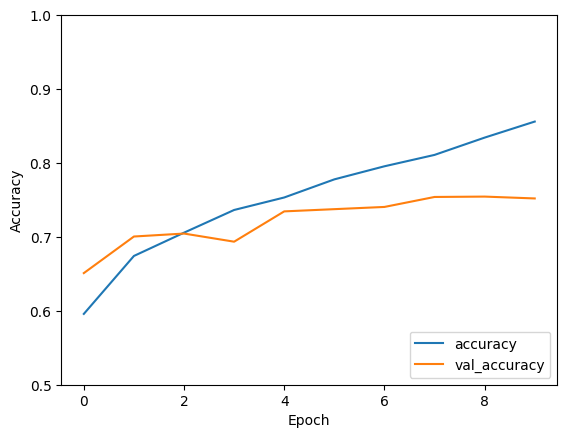

In [1]:
# prompt: Train a CNN to discriminate cats and dogs using CIFAR-10 data

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Select cat and dog classes (labels 3 and 5 in CIFAR-10)
cat_dog_train_images = train_images[(train_labels[:, 0] == 3) | (train_labels[:, 0] == 5)]
cat_dog_train_labels = train_labels[(train_labels[:, 0] == 3) | (train_labels[:, 0] == 5)]
cat_dog_test_images = test_images[(test_labels[:, 0] == 3) | (test_labels[:, 0] == 5)]
cat_dog_test_labels = test_labels[(test_labels[:, 0] == 3) | (test_labels[:, 0] == 5)]

# Convert labels to binary (0 for cat, 1 for dog)
cat_dog_train_labels = (cat_dog_train_labels[:, 0] == 5).astype(int)
cat_dog_test_labels = (cat_dog_test_labels[:, 0] == 5).astype(int)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(cat_dog_train_images, cat_dog_train_labels, epochs=10,
                    validation_data=(cat_dog_test_images, cat_dog_test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(cat_dog_test_images, cat_dog_test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [126]:
# create a transofrm to apply to each datapoint
transform = transforms.Compose([transforms.ToTensor()])

# download the MNIST datasets
path = '/content/data'
train_dataset = CIFAR10(path, transform=transform, download=True)
test_dataset  = CIFAR10(path, transform=transform, download=True)

# create train and testt dataloaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Files already downloaded and verified
Files already downloaded and verified


In [139]:
def create_dog_cat_datasets(dataloader, batch_size=32, shuffle=True):

    cat_dog_images = []
    cat_dog_labels = []

    for images, labels in dataloader:
        # Find indices where labels are 3 (cat) or 5 (dog)
        mask = (labels == 3) | (labels == 5)

        # Filter images and labels
        filtered_images = images[mask]
        filtered_labels = labels[mask]

        # Relabel cats as 0 and dogs as 1
        filtered_labels = (filtered_labels == 5).long()

        cat_dog_images.append(filtered_images)
        cat_dog_labels.append(filtered_labels)

    # Concatenate all filtered images and labels into tensors
    final_images = torch.cat(cat_dog_images, dim=0)
    final_labels = torch.cat(cat_dog_labels, dim=0)

    # Create a TensorDataset and DataLoader with the filtered data
    dataset = TensorDataset(final_images, final_labels)
    filtered_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

    return filtered_dataloader


In [140]:
train_dog_cat_loader = create_dog_cat_datasets(train_loader)
test_dog_cat_loader = create_dog_cat_datasets(test_loader)

In [143]:
def display_examples(train_dog_cat_loader, num_rows=5, num_cols=5, class_names=None):
  # Get a batch of images and labels from the DataLoader
  dataiter = iter(train_dog_cat_loader)
  images, labels = next(dataiter)

  # Create a figure and subplots
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
  axes = axes.flatten()

  # Iterate through the images and labels
  for i in range(num_rows * num_cols):
    image = images[i].numpy().transpose((1, 2, 0))
    label = labels[i].item()

    axes[i].imshow(image)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

    if class_names:
      axes[i].set_title(class_names[label])
    else:
      axes[i].set_title(f"Class: {label}")

  plt.tight_layout()
  plt.show()

tensor([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 0])


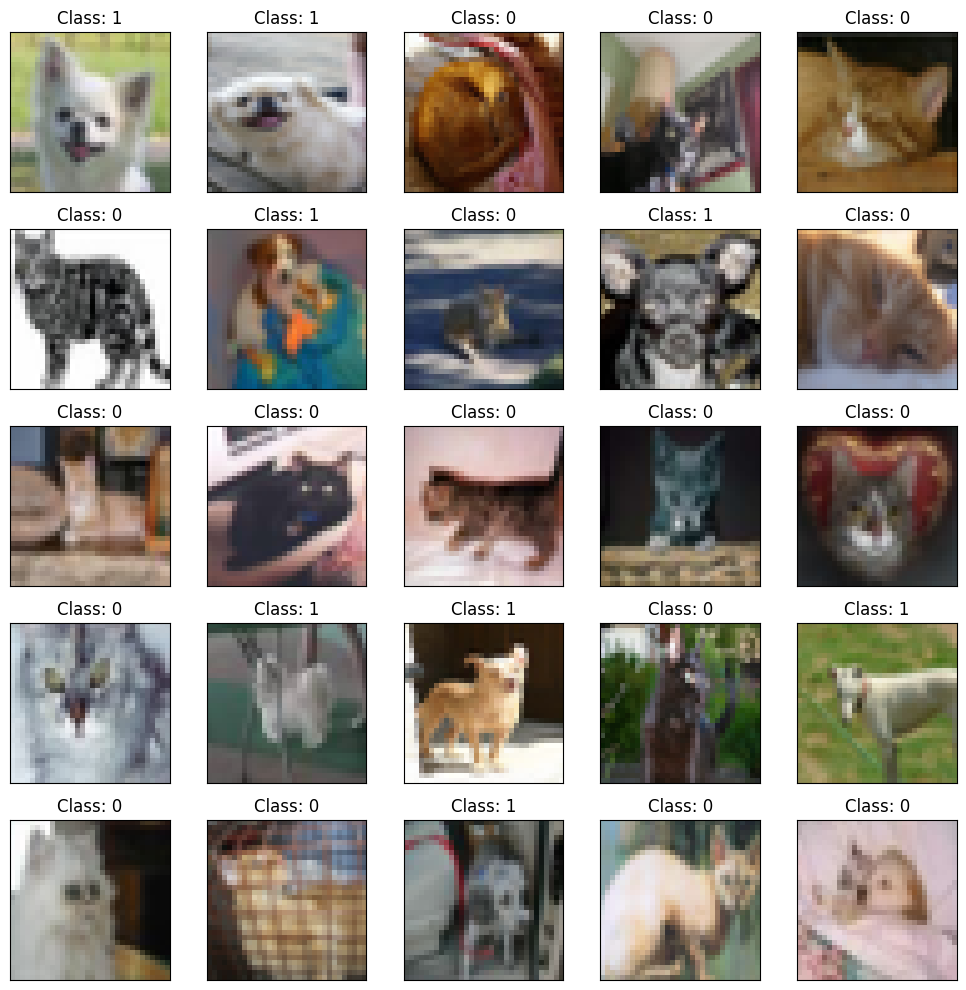

In [142]:
display_examples(train_dog_cat_loader,num_rows=5, num_cols=5)

In [151]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)
        # Calculate the output size after convolutional layers
        # This is crucial for determining the input size of the first fully connected layer
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64* 64,  64)  # Adjust this based on the calculated output size
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = torch.relu(self.conv3(x))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [152]:
model = CNN()

# Define the optimizer
optimizer = Adam(model.parameters(), lr=0.001)

# Define the loss function
criterion = nn.BCELoss()

# Define the metric (accuracy)
def accuracy(outputs, labels):
    preds = torch.round(outputs)  # Round the outputs to 0 or 1
    correct = (preds == labels).float()
    acc = correct.sum() / len(correct)
    return acc

In [155]:
import torch
import torch.nn as nn

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dog_cat_loader):
        images = images.to(device)
        labels = labels.to(device).float()  # Ensure labels are float for BCELoss

        # Forward pass
        outputs = model(images).squeeze()  # Single output neuron for binary classification
        loss = criterion(outputs, labels)  # Binary cross-entropy loss

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_dog_cat_loader)}], Loss: {loss.item():.4f}')

    # Validation
    with torch.no_grad():
        model.eval()
        correct = 0
        total = 0
        for images, labels in train_dog_cat_loader:
            images = images.to(device)
            labels = labels.to(device).float()
            outputs = model(images).squeeze()
            predictions = (outputs > 0.5).float()  # Threshold at 0.5
            total += labels.size(0)
            correct += (predictions == labels).sum().item()
        accuracy = 100 * correct / total
        print(f'Validation Accuracy: {accuracy:.2f}%')
    model.train()

# Evaluation on test set
with torch.no_grad():
    model.eval()
    correct = 0
    total = 0
    for images, labels in test_dog_cat_loader:
        images = images.to(device)
        labels = labels.to(device).float()
        outputs = model(images).squeeze()
        predictions = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predictions == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')


Epoch [1/10], Step [100/313], Loss: 0.2026
Epoch [1/10], Step [200/313], Loss: 0.1830
Epoch [1/10], Step [300/313], Loss: 0.0635
Validation Accuracy: 96.14%
Epoch [2/10], Step [100/313], Loss: 0.0177
Epoch [2/10], Step [200/313], Loss: 0.0471
Epoch [2/10], Step [300/313], Loss: 0.0871
Validation Accuracy: 99.13%
Epoch [3/10], Step [100/313], Loss: 0.1155
Epoch [3/10], Step [200/313], Loss: 0.0364
Epoch [3/10], Step [300/313], Loss: 0.2670
Validation Accuracy: 97.94%
Epoch [4/10], Step [100/313], Loss: 0.0581
Epoch [4/10], Step [200/313], Loss: 0.1448
Epoch [4/10], Step [300/313], Loss: 0.0379
Validation Accuracy: 97.77%
Epoch [5/10], Step [100/313], Loss: 0.0228
Epoch [5/10], Step [200/313], Loss: 0.0445
Epoch [5/10], Step [300/313], Loss: 0.0293
Validation Accuracy: 97.74%
Epoch [6/10], Step [100/313], Loss: 0.0104
Epoch [6/10], Step [200/313], Loss: 0.1039
Epoch [6/10], Step [300/313], Loss: 0.0088
Validation Accuracy: 99.69%
Epoch [7/10], Step [100/313], Loss: 0.0385
Epoch [7/10], S

In [163]:


def create_datasets_without_dogs_cats(dataloader, batch_size=32, shuffle=True):

    filtered_images = []
    filtered_labels = []

    for images, labels in dataloader:
        # Find indices where labels are NOT 3 (cats) or 5 (dogs)
        mask = (labels != 3) & (labels != 5)

        # Filter images and labels
        filtered_images.append(images[mask])
        filtered_labels.append(labels[mask])

    # Concatenate all filtered images and labels into tensors
    final_images = torch.cat(filtered_images, dim=0)
    final_labels = torch.cat(filtered_labels, dim=0)

    # Reindex labels to remove gaps (map 0-9 labels to 0-7)
    label_mapping = {0: 0, 1: 1, 2: 2, 4: 3, 6: 4, 7: 5, 8: 6, 9: 7}
    relabeled = torch.tensor([label_mapping[label.item()] for label in final_labels])

    # Create a TensorDataset and DataLoader with the filtered data
    dataset = TensorDataset(final_images, relabeled)
    filtered_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

    return filtered_dataloader

In [164]:
train_dataset_without_dogs_cats = create_datasets_without_dogs_cats(train_loader)
test_dataset_without_dogs_cats = create_datasets_without_dogs_cats(test_loader)

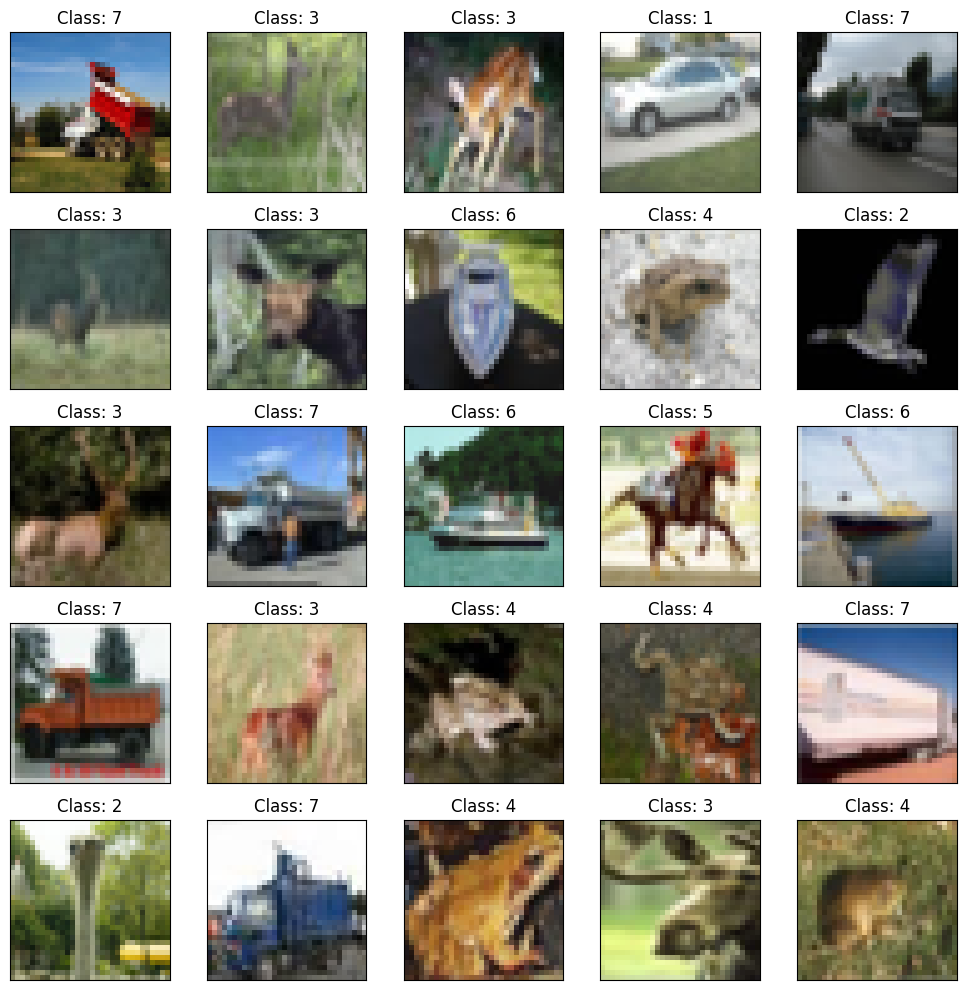

In [165]:
display_examples(train_dataset_without_dogs_cats)

In [166]:
# Define the Autoencoder Architecture
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),  # Output: (64, 16, 16)
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),  # Output: (128, 8, 8)
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # Output: (256, 4, 4)
            nn.ReLU(),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (128, 8, 8)
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # Output: (3, 32, 32)
            nn.Sigmoid(),  # Scale output to [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x




In [167]:
def add_noise(images, noise_factor=0.1):
    noise = torch.randn_like(images) * noise_factor
    noisy_images = images + noise
    return torch.clamp(noisy_images, 0., 1.)  # Clamp to [0, 1]

In [169]:
def train_autoencoder(model, dataloader, num_epochs=10, learning_rate=1e-3, noise_factor=0.1):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, _ in dataloader:
            images = images.to(device)
            noisy_images = add_noise(images, noise_factor).to(device)

            # Forward pass
            outputs = model(noisy_images)
            loss = criterion(outputs, images)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(dataloader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    print("Finished Training")
    return model


Epoch [1/10], Loss: 0.0089
Epoch [2/10], Loss: 0.0051
Epoch [3/10], Loss: 0.0046
Epoch [4/10], Loss: 0.0043
Epoch [5/10], Loss: 0.0042
Epoch [6/10], Loss: 0.0041
Epoch [7/10], Loss: 0.0040
Epoch [8/10], Loss: 0.0039
Epoch [9/10], Loss: 0.0039
Epoch [10/10], Loss: 0.0039
Finished Training


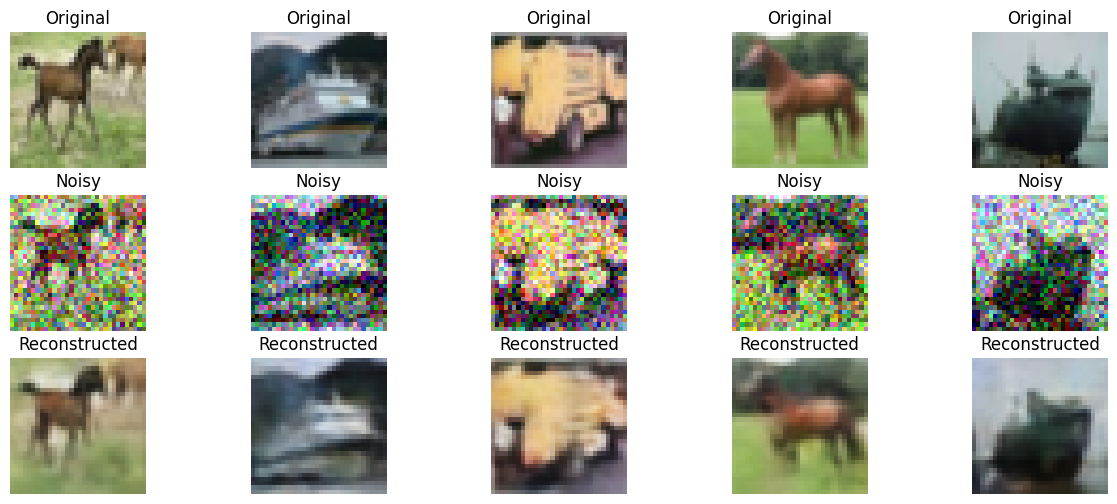

In [170]:
autoencoder = DenoisingAutoencoder()

# Train the Autoencoder
trained_autoencoder = train_autoencoder(autoencoder, train_dataset_without_dogs_cats, num_epochs=10, learning_rate=1e-3, noise_factor=0.2)

# Test Reconstruction
import matplotlib.pyplot as plt

# Visualize Original, Noisy, and Reconstructed Images
def visualize_reconstruction(model, dataloader, noise_factor=0.2):
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    images, _ = next(iter(dataloader))
    images = images.to(device)
    noisy_images = add_noise(images, noise_factor).to(device)
    with torch.no_grad():
        reconstructed = model(noisy_images)

    # Convert to CPU and display
    images = images.cpu().numpy().transpose(0, 2, 3, 1)
    noisy_images = noisy_images.cpu().numpy().transpose(0, 2, 3, 1)
    reconstructed = reconstructed.cpu().numpy().transpose(0, 2, 3, 1)

    # Plot the results
    fig, axs = plt.subplots(3, 5, figsize=(15, 6))
    for i in range(5):
        axs[0, i].imshow(images[i])
        axs[0, i].set_title("Original")
        axs[0, i].axis('off')
        axs[1, i].imshow(noisy_images[i])
        axs[1, i].set_title("Noisy")
        axs[1, i].axis('off')
        axs[2, i].imshow(reconstructed[i])
        axs[2, i].set_title("Reconstructed")
        axs[2, i].axis('off')
    plt.show()

# Visualize Reconstructions
visualize_reconstruction(trained_autoencoder, train_dataset_without_dogs_cats, noise_factor=0.2)

In [171]:
class FineTunedModel(nn.Module):
    def __init__(self, pre_trained_autoencoder):
        super(FineTunedModel, self).__init__()
        self.encoder = pre_trained_autoencoder.encoder  # Use the pre-trained encoder
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1),  # Input size depends on the encoder output size
            nn.Sigmoid()  # For binary classification
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x

In [172]:
def fine_tune_model(model, train_loader, test_loader, num_epochs=10, learning_rate=1e-4):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
    optimizer = Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device).float()  # For BCE loss

            # Forward pass
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

        # Validation
        with torch.no_grad():
            model.eval()
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images).squeeze()
                predictions = (outputs > 0.5).float()  # Binary predictions
                total += labels.size(0)
                correct += (predictions == labels).sum().item()

            accuracy = 100 * correct / total
            print(f'Validation Accuracy: {accuracy:.2f}%')

    print("Finished Fine-Tuning")
    return model

In [175]:
# Load Pre-Trained Autoencoder
autoencoder = trained_autoencoder

# Create Fine-Tuned Model
fine_tuned_model = FineTunedModel(autoencoder)

In [176]:
fine_tuned_model = fine_tune_model(fine_tuned_model, train_dog_cat_loader, test_dog_cat_loader, num_epochs=20)

Epoch [1/20], Loss: 0.6249
Validation Accuracy: 70.63%
Epoch [2/20], Loss: 0.5701
Validation Accuracy: 71.28%
Epoch [3/20], Loss: 0.5449
Validation Accuracy: 73.72%
Epoch [4/20], Loss: 0.5288
Validation Accuracy: 76.24%
Epoch [5/20], Loss: 0.5114
Validation Accuracy: 76.59%
Epoch [6/20], Loss: 0.4971
Validation Accuracy: 76.37%
Epoch [7/20], Loss: 0.4846
Validation Accuracy: 78.42%
Epoch [8/20], Loss: 0.4739
Validation Accuracy: 78.74%
Epoch [9/20], Loss: 0.4611
Validation Accuracy: 80.45%
Epoch [10/20], Loss: 0.4532
Validation Accuracy: 79.99%
Epoch [11/20], Loss: 0.4396
Validation Accuracy: 80.64%
Epoch [12/20], Loss: 0.4286
Validation Accuracy: 82.55%
Epoch [13/20], Loss: 0.4200
Validation Accuracy: 79.51%
Epoch [14/20], Loss: 0.4088
Validation Accuracy: 83.49%
Epoch [15/20], Loss: 0.3985
Validation Accuracy: 82.29%
Epoch [16/20], Loss: 0.3900
Validation Accuracy: 84.36%
Epoch [17/20], Loss: 0.3766
Validation Accuracy: 84.85%
Epoch [18/20], Loss: 0.3689
Validation Accuracy: 86.44%
E

In [179]:
with torch.no_grad():
            fine_tuned_model.eval()
            correct = 0
            total = 0
            for images, labels in test_dog_cat_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = fine_tuned_model(images).squeeze()
                predictions = (outputs > 0.5).float()  # Binary predictions
                total += labels.size(0)
                correct += (predictions == labels).sum().item()

            accuracy = 100 * correct / total
            print(f'Validation Accuracy: {accuracy:.2f}%')

Validation Accuracy: 86.94%
